     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
🔹 Quantum Circuit:


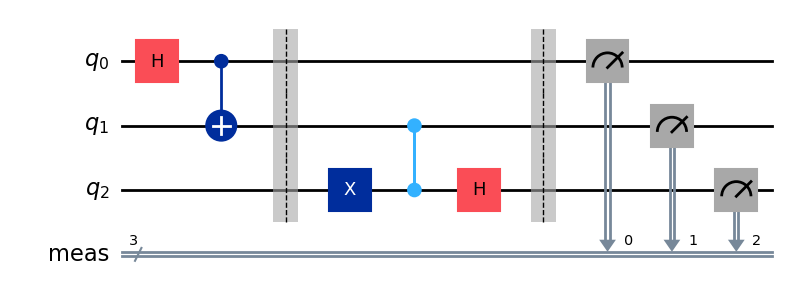


🔹 Generated OpenQASM 3 Code:

OPENQASM 3.0;
include "stdgates.inc";
bit[3] meas;
qubit[3] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1], q[2];
x q[2];
cz q[1], q[2];
h q[2];
barrier q[0], q[1], q[2];
meas[0] = measure q[0];
meas[1] = measure q[1];
meas[2] = measure q[2];


🔹 Gate Representation in QASM:
Hadamard gate → represented as:  h q[i];
CNOT gate     → represented as:  cx q[control], q[target];
Barrier       → represented as:  barrier q[0], q[1], q[2];

🔹 Simulation Result Counts:
{'011': 237, '111': 271, '100': 278, '000': 238}


In [1]:
# ===============================
# 🧠 Qiskit 2.x – OpenQASM 3 with Modified 3-Qubit Circuit
# ===============================

!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import qiskit.qasm3 as qasm3
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# -------------------------------
# Build a 3-qubit circuit
# -------------------------------
qc = QuantumCircuit(3)

# Apply a different gate sequence
qc.h(0)           # Create superposition on qubit 0
qc.cx(0, 1)       # Entangle qubit 0 with qubit 1
qc.barrier()      # Add barrier for clarity
qc.x(2)           # Apply Pauli-X on qubit 2
qc.cz(1, 2)       # Controlled-Z between qubit 1 and 2
qc.h(2)           # Add another H gate on qubit 2
qc.measure_all()  # Measure all qubits

# -------------------------------
# Display circuit diagram
# -------------------------------
print("🔹 Quantum Circuit:")
try:
    display(qc.draw('mpl'))
except Exception:
    print(qc.draw(output='text'))

# -------------------------------
# Export circuit to OpenQASM 3
# -------------------------------
qasm_code = qasm3.dumps(qc)
print("\n🔹 Generated OpenQASM 3 Code:\n")
print(qasm_code)

# -------------------------------
# Identify gate syntax in QASM
# -------------------------------
print("\n🔹 Gate Representation in QASM:")
print("Hadamard gate → represented as:  h q[i];")
print("CNOT gate     → represented as:  cx q[control], q[target];")
print("Barrier       → represented as:  barrier q[0], q[1], q[2];")

# -------------------------------
# Simulate the modified circuit
# -------------------------------
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts()

print("\n🔹 Simulation Result Counts:")
print(counts)

plot_histogram(counts, title="3-Qubit Modified Circuit Results")
plt.show()
